# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.


## 01 - Case study:



In [43]:
# Importing the libraries

import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## 02 - Getting Data / Data Cleaning


In [44]:
# Importing the dataframe

df = pd.read_csv("/Users/leozinho.air/Desktop/ironhack_da/class_04/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")

# In this notebook i stored some functions that help me to clean, process and plot the data

%run /Users/leozinho.air/Desktop/ironhack_da/class_08/lab-customer-analysis-final-round/data_cleaning_function.ipynb


cleaned_df = df_cleaning(df) # function call

print('\n')

data_types = cleaned_df.dtypes

print(data_types)

print('\n')

print('The database has no null values as we decided to remove them in the previous labs')


This is the df shape (9134, 24)


Numerical columns are:  ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount', 'month']


Categorical columns are:  ['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int

## 03 Wrangling/EDA

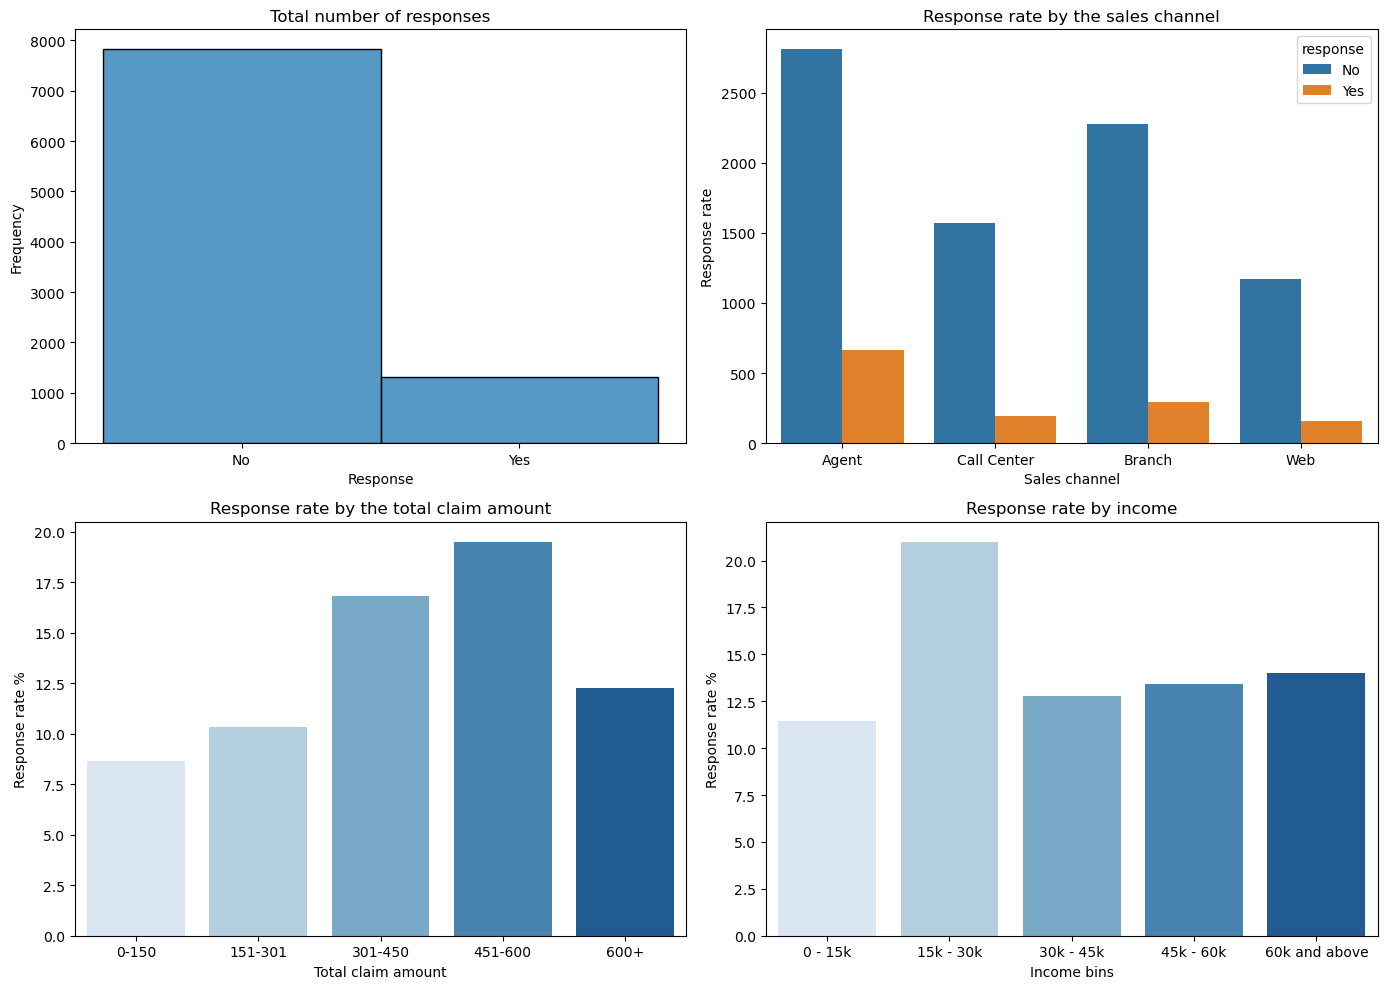

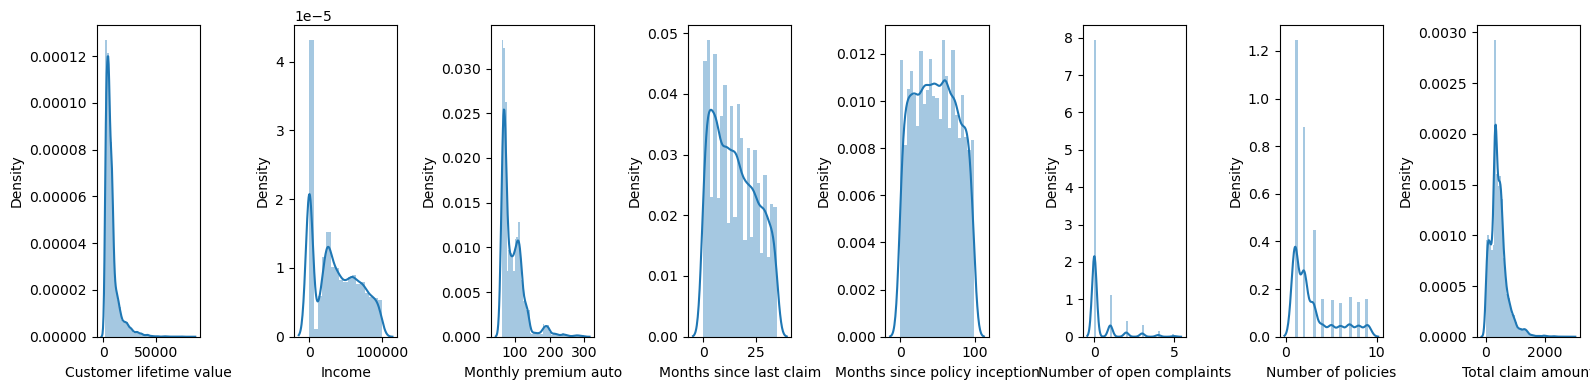

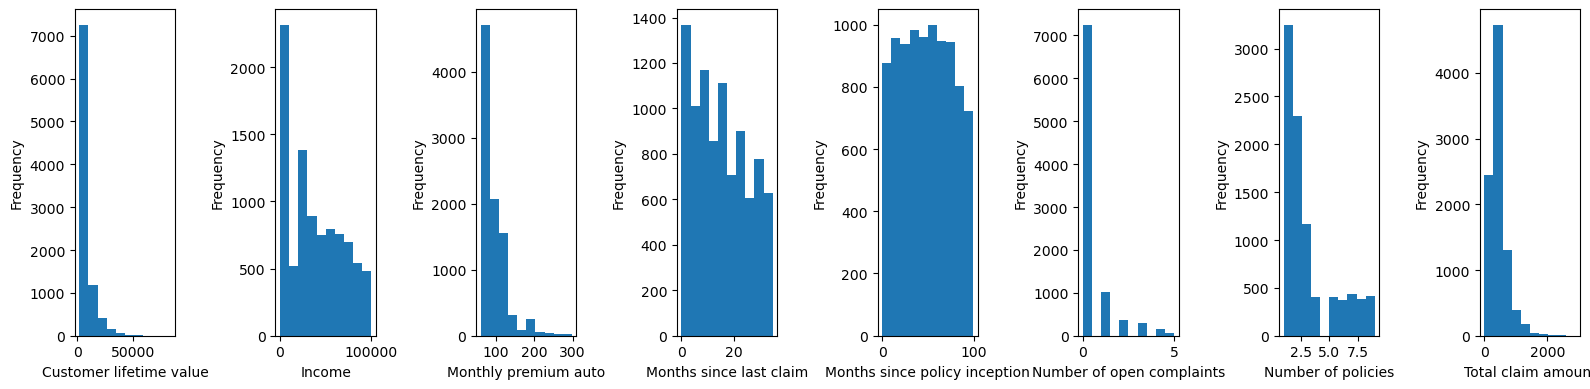

In [45]:
# This function shows the graphs done in "lab customer analysis 3"

eda_02(cleaned_df)

# Split the df to numerical/categorical sub-df

df_num = cleaned_df.select_dtypes(include = np.number)

df_cat = cleaned_df.select_dtypes(include = object)

# This function shows the distribuitions of the numerical columns of the df

columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']

plot_distribution(df_num, columns)



## 04 - Processing Data/ Modeling / Model Evaluation

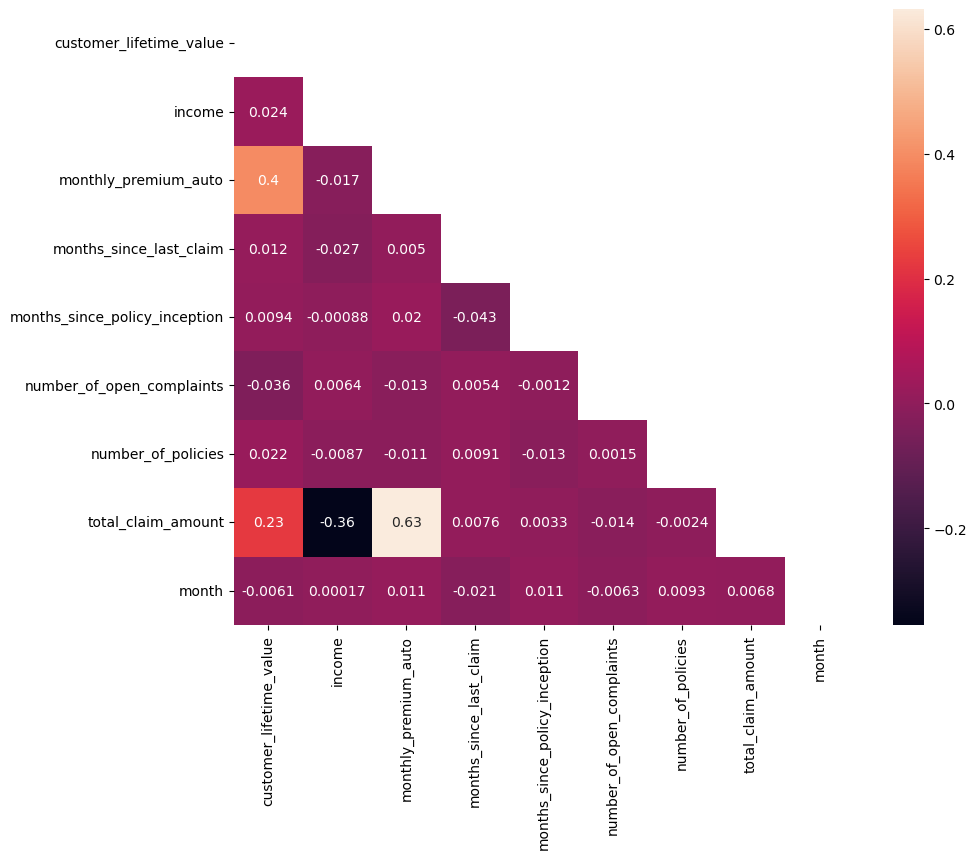

There is no multicollinearity between the numerical features


In [46]:
# Check the multicollinearity between the features. 


correlations_matrix = df_num.corr()
correlations_matrix

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

print('There is no multicollinearity between the numerical features')



In [47]:
 # X - y split

y = cleaned_df['total_claim_amount']
X = cleaned_df.drop(['total_claim_amount','customer','gender','renew_offer_type', 'vehicle_size'], axis = 1)

# Creating a dataframe with only numerical values

X_num = X.select_dtypes(include = np.number)

# Normalizing X num

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # This is the normalization process
normalized_X = scaler.fit_transform(X_num) 
normalized_X = pd.DataFrame(normalized_X, columns = X_num.columns)


# One Hot Encoding over categorical vars

X_cat = X.select_dtypes(include = object)

X_dummies = pd.get_dummies(X_cat, drop_first= False)

X_dummies = X_dummies.reset_index(drop = True)


# Concatenating the two dfs

X = pd.concat([normalized_X, X_dummies], axis = 1) # no y dep


# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluate the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test)


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

R2 value is = 0.7775
The mean squared error of the model is = 19385.22
The root mean squared error of the model is = 139.23
The mean absolute error of the model is = 96.23


## 05 - Model results

The values for the target value 'total_claim_amunt' can be explained to 77% by the features of our model.
<br>
Further analysis of the data should try to improve the model, as a MAE of 96.23 is very high.
